In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv, json

# math packages:
import pandas as pd
import numpy as np
import datetime as dt 


# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker


import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

# home brew utitilties
import resources.utility_functions as ut
import resources.sr_ut as sut


def push_this_to_json(filename="", data=[]):
    with open(filename, "w") as a_file:
        json.dump(data, a_file)

(codegroups)=
# Code groups

The IQAASL project used the item codes and descriptions from the Marine Strategy Framework (MSFD) _master list_ {cite}`mlwguidance`.  Item identification follows the protocols from the MSFD Technical Subgroup on Marine Litter. The master list was developed based on the categories of items used in a series of programs and is one of the most detailed, representing the most developed protocols in the EU.

There are 217 identification codes from the MSFD master list used to classify all objects collected from a survey. The MSFD codes begin with _G1_ and end with _G217_. 

## Accounting for regional objects

There are items that are found regularly in Switzerland that do not appear in the _master list_. To account for this 43 additional codes were added to the master list under the _parent code_ G124. These codes start with G900 and end with G999.


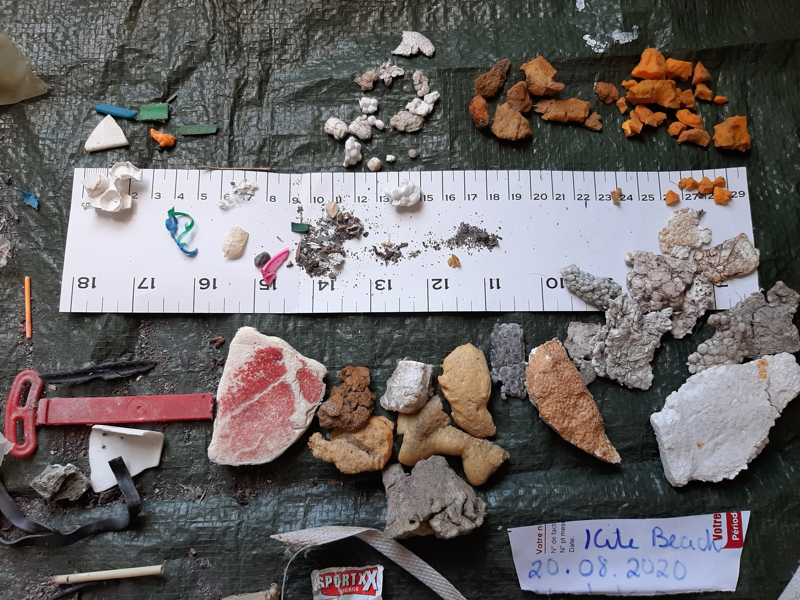

In [2]:
bassin_map = PILImage.open("resources/codegroups/images/20200824foamWalenstadt.jpg")

transposed  = bassin_map.rotate(180)
output = io.BytesIO()
transposed.thumbnail((800, 1200))
transposed.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In [3]:
# aggregated survey data
dfAgg = pd.read_csv("resources/agg_results_with_land_use_2015.csv")
dfAgg['date'] = pd.to_datetime(dfAgg['date'])

# get your data:
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")

# beach data
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")

today = dt.datetime.now().date().strftime("%Y-%m-%d")

output = "output"

project_directory = ut.make_project_folder(output, 'code_groups')

The MSFD code G124 _other plastic/polystyrene items, identifiable_ allows for quantification of unlisted identifiable plastic items. An item such as G913 _pacifier_ can be quantified independently and linked to the MSFD code G124. This work is done at the server and the data can be analyzed using either form.

Identifiable plastic objects were either attributed to an additional code such as G937 or G913, or if no other code described the item then G124 was used. Some additional codes were included to capture pandemic related items such as:

*  G901 Mask medical, synthetic (Parent code (G124) other plastic/polystyrene items identifiable)
*  G902 Mask medical, cloth (Parent code (G145) other textiles)

**Codes and parent codes:** accounting for regional differences. G902 is linked to G145 by the value in the column __parent_code__. G937 is linked to G124 by the parent code


In [4]:
dfCodes[dfCodes.code.isin(["G124", "G902", "G145","G937"])][['code', 'material', 'description', 'source', 'parent_code', 'direct', 'single_use', 'micro','groupname']].set_index('code')

,material,description,source,parent_code,direct,single_use,micro,groupname
code,,,,,,,,
G145,Cloth,Other textiles,Undefined,Parent code,True,False,False,personal items
G902,Cloth,"Mask medical, cloth",Personal hygiene,G145,True,False,False,personal items
G124,Plastic,Other plastic or foam products,Undefined,Parent code,True,False,False,unclassified
G937,Plastic,Pheromone baits for vineyards,Agriculture,G124,False,False,False,agriculture


### Modifications and material descriptions

### Personal and hygiene items:

* G96 sanitary towels, panty liners modified to include plastic tampon applicators.
* Plastic adhesive bandages classified as plastic

### Micro plastics

The objective of this project was to quantify observable litter which tends to be greater than 0.5 cm but the lower limit of natural visible detection when surveying a shore line is around 0.2 - 0.5 cm. Over the course of a survey, visible micro items are collected with the lager material and composition is generally identifiable. The IQAASL project did not include methods to specifically target items less than 5mm but all visible micro plastics collected during a survey were quantified, weighed and categorized using 20 codes (G103 - G123) available from MSFD Masterlist to classify plastics less than 5mm. See Annex B Micro plastic codes. To best identify and quantify microplastics for this project 3 codes were modified from the

Codes modified to account for objects less than 5mm:

* G75 Plastic/polystyrene pieces 0 - 2.5 cm modified to 0.5 cm - 2.5 cm
* G78 Plastic pieces 0 - 2.5cm modified to 0.5cm - 2.5cm
* G81 Polystyrene pieces 0 - 2.5cm modified to 0.5 cm - 2.5 cm

### Not applicable or omitted items

Of the 217 MSFD codes available 176 of the items were identified in the 2020-2021 surveys. Several items are notapplicable to Swiss freshwater systems as they pertain to marine aquaculture production:

* G207 octopus pots
* G163 crab/lobster pots
* G47 plastic sheeting from mussel culture
* G215 food waste/galley waste*

*All naturally biodegradable food waste as well as feces collection and quantification was omitted from this project*.

In [5]:
# directory listing of the group definitions
code_group2 = {
    "waste water": "wastewater.json" ,
    "micro plastics (< 5mm)":"codeListMicros.json",
    "infrastructure":"construction2.json",
    "food and drink":"foodstuff.json",
    "agriculture":"ag2.json",
    "tobacco":"tobac.json",
    "plastic pieces":"plasticpcs.json",
    "recreation":"recreation.json",    
    "packaging non food":"packaging.json",
    "personal items":"pi.json", 
    "unclassified": "nogroup.json"
}
# saving to .json
# push_this_to_json(filename=F"{project_directory}/code_group2.json", data=code_group2)

### Fragmented plastics: Gfrags

The Plastic fragments group (Gfrags for analysis) are all plastic or foam/plastic composite pieces greater than 0.5 cm. Plastic pieces found along Swiss shorelines are predominately small, hard, highly fragmented pieces of a pigmented item. The original use and source is principally undetermined. Individual plastic pieces were quantified by material and size:

*Fragmented plastics code group, Gfrags*

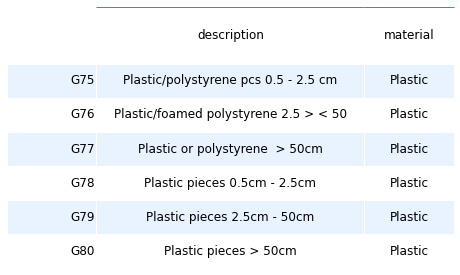

In [6]:
plasticpcs = [
    "G78",
    "G79",
    "G80",
    "G75", 
    "G76", 
    "G77" 
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/plasticpcs.json", data=plasticpcs)

# print table
wwcodes = dfCodes[dfCodes.code.isin(plasticpcs)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

table_one=wwcodes.copy()

a_color='dodgerblue'

fig, axs = plt.subplots(figsize=(8,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Expanded foams: Gfoams

Expanded polystyrene G81, G82, G83 are grouped as Gfoam, a detailed inventory of the type and size of foam is provided with each reprot. The expanded foamed plastics are light, friable, commonly white and used for packaging or insulation. Foamed items commonly used for take out food G10, sponge foams G73 and denser insulation foams G74 are categorized separately and not included in the expanded polystyrene group.

:::{note}
(G117) styrofoam < 5mm. less than 5mm were identified as polystyrene beads, brand name Styrofoam® and grouped with micro plastics.
:::

*Expanded foams: Gfrags, does not included extruded foams*

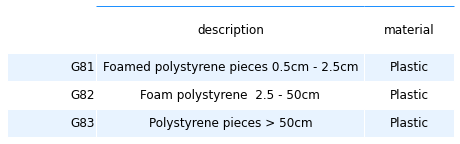

In [7]:
# print table
wwcodes = dfCodes[dfCodes.code.isin(["G81", "G82", "G83"])][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

table_one=wwcodes.copy()

a_color='dodgerblue'

fig, axs = plt.subplots(figsize=(8,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

## Objects grouped by use 

Individual item codes have been grouped to best describe usage and possible sources. It is acknowledged that some items in a group contribute to a percentage rather than the whole sum. Code grouping is a broad analysis method to evaluate the discarded materials found in water systems by economic sectors or physical properties. Items are also analyzed independently in this report. The grouping is derived from field observations and research to determine possible sources of various pollutants

1. wastewater: items released from water treatment plants includes items likely toilet flushed   
2. micro plastics (< 5mm): foam and plastic fragments and pre-production plastic resins
3. infrastructure: items related to construction and maintenance of all buildings, roads and water/power supplies 
4. food/drink: primarily single use plastic items related to consuming food and drinks outdoors  
5. agriculture: primarily industrial sheeting; mulch films, row coverings, polytunnels, greenhouse sheeting, soil fumigation films, bale wraps as well as hard plastics; agricultural fencing, plastic flower pots etc. 
6. tobacco: primarily cigarette filters includes all smoking related material 
7. recreation: fishing, hunting, boating and beach related objects, excludes food, drink and tobacco   
8. packaging non food/drink: packaging or wrapping material not identifiable as food, drink nor tobacco related  
9. plastic pieces: plastic or foam/plastic composite pieces greater than 0.5 cm
10. personal items: personal use related; accessories, hygiene and clothing
11. Unclassified: ungrouped item codes



### Wastewater treatment 

Wastewater treatment codes includes items that may have been toilet flushed and released from a water treatment bypass or inadequate filtering for items such as cotton swabs. 

:::{note}

G98 includes diapers and wipes. Diapers are rarely found in Swiss water systems the quantities should be attributed to personal hygiene wipes.
:::

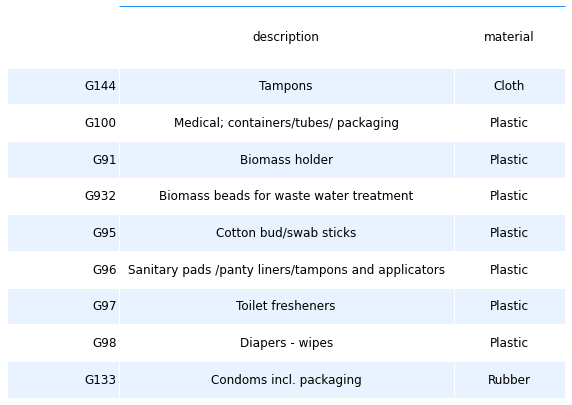

In [8]:
# group definition
wastewater = [
    'G91',
    'G95',
    'G96',
    'G98',
    'G97',
    'G100',
    'G133',
    'G932',
    'G144'
]
# saving to .json
# push_this_to_json(filename=F"{project_directory}/wastewater.json", data=wastewater)

# make table
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

# shorten the description for display
wwcodes.loc[wwcodes.code == 'G932', 'description'] = "Biomass beads for waste water treatment"

table_one=wwcodes.copy()

a_color='dodgerblue'

fig, axs = plt.subplots(figsize=(10,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Micro plastic codes

Micro codes are all micro plastics and foams from MSFD Master List of Categories of Litter Items Annex 8.1 items G103-G123. Not all codes have been identified in our data.  The objective of this project was to quantify observable litter which tends to be greater than 0.5 cm but the lower limit of natural visible detection when surveying a shore line is around 0.2 - 0.5 cm. 

Over the course of a survey, visible micro items are collected with the lager material and composition is generally identifiable. The IQAASL project did not include methods to specifically target items less than 5mm but all visible micro plastics collected during a survey were quantified, weighed and categorized using 20 codes G103 - G123 available to classify plastics less than 5mm.

*Plastic objects less than 5mm*

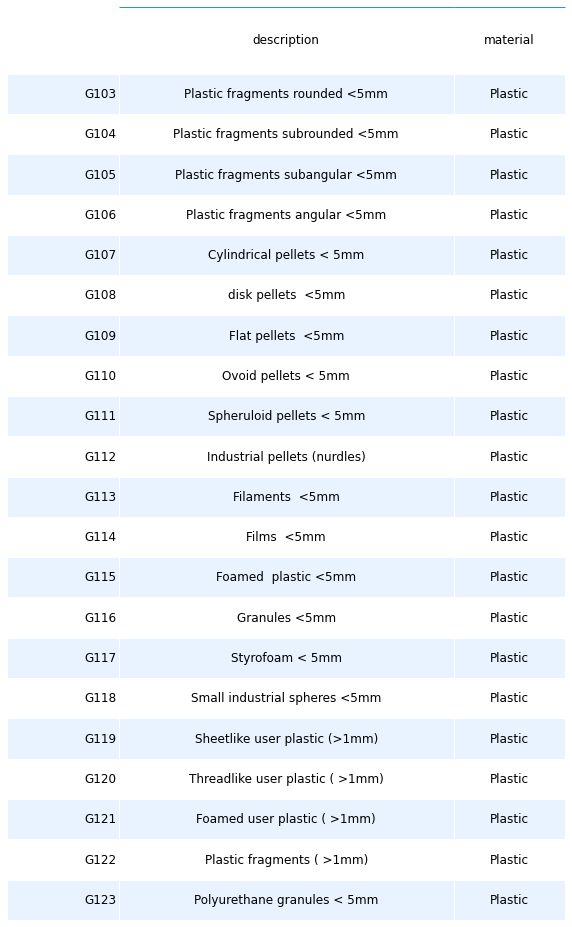

In [9]:
# define group
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]
# push_this_to_json(filename=F"{project_directory}/codeListMicros.json", data=codesmicro)

# make table
wwcodes = dfCodes[dfCodes.code.isin(codesmicro)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

table_one=wwcodes

fig, axs = plt.subplots(figsize=(10,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Infrastructure codes

Infrastructure relates to all forms of construction, renovations and maintenance of public and private structures including roads, bridges and ports as well as power and water supplies. Codes G909-G912 were created to differentiate foams used for insulation from packaging foams.

Along Swiss shorelines the most common construction plastics are fragments and pieces of all sizes and types of ABS, PVC piping and other flexible and rigid hosing, cable protectors as well as associated connectors, fittings and covers. Also common are plastics used in concrete forming such as dowels, anchors and spacers. Some items associated with plastic construction have unique codes such as G93: _cable ties_  or G17: _injection gun containers_.

Other items in the infrastrucutre group have a more general use case:

* G186 Industrial scrap
* G194 Metal cables

*Infrastructure group items*

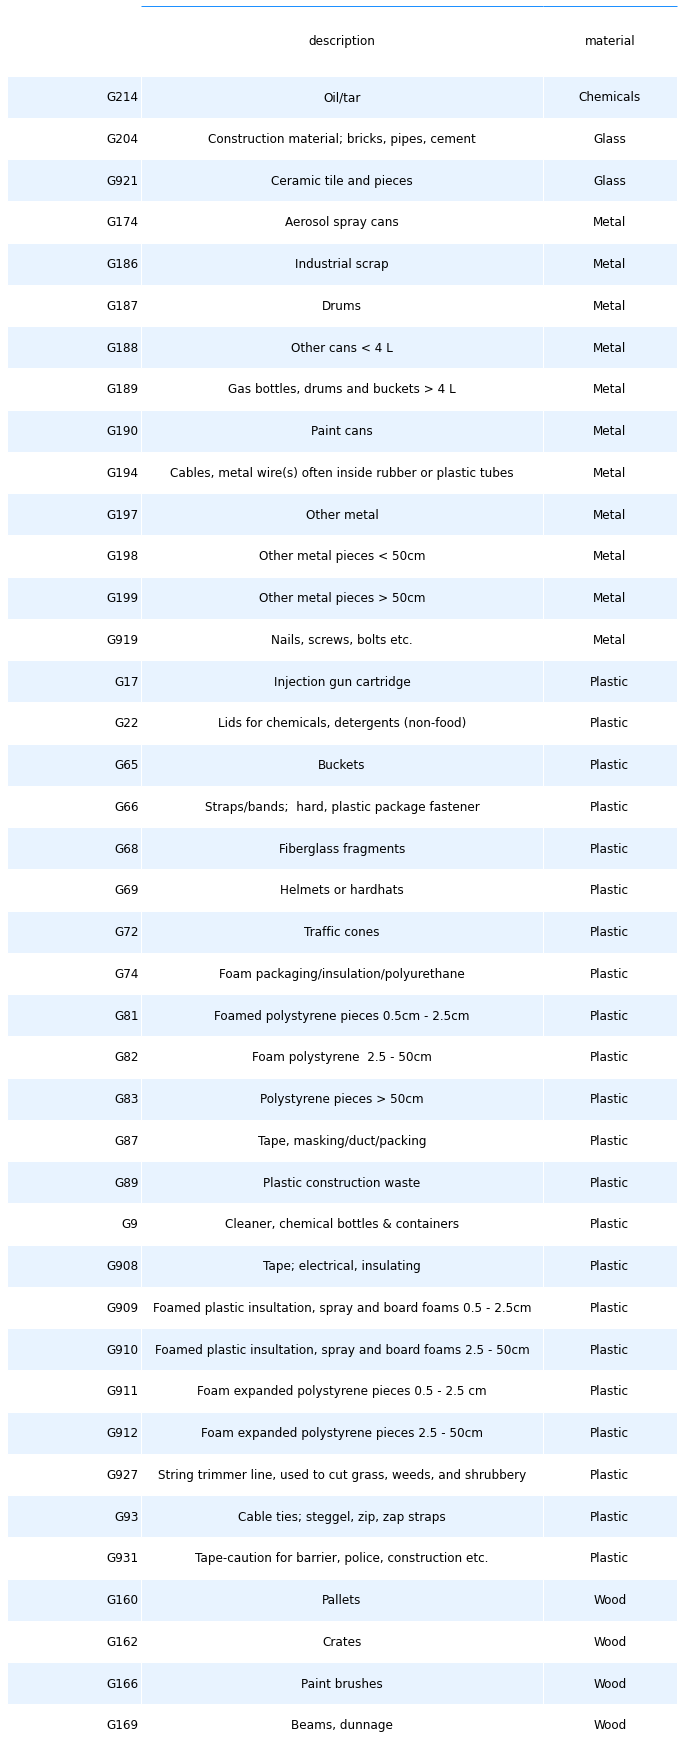

In [10]:
# define group
construction2= [
            'G9',
            'G204',
            'G187',
            'G919',
            'G65',
            'G17',
            'G22',
            'G66',
            'G68',
            'G69',
            'G72',
            'G74',
            'G81',
            'G82',
            'G83',
            'G87',
            'G89',
            'G93',
            'G160',
            'G162',
            'G166',
            'G169',
            'G174',
            'G186',
            'G188',
            'G189',
            'G190',
            'G194',
            'G197',
            'G198',
            'G199',
            'G214',
            'G908',
            'G909',
            'G910',
            'G911',
            'G912',
            'G921',
            'G927',
            'G931'
]
# saving to .json
# push_this_to_json(filename=F"{project_directory}/construction2.json", data=construction2)

# make table
wwcodes = dfCodes[dfCodes.code.isin(construction2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']].copy()

# shorten the description for display
wwcodes.loc[wwcodes.code == 'G909', 'description'] = "Foamed plastic insultation, spray and board foams 0.5 - 2.5cm"
wwcodes.loc[wwcodes.code == 'G910', 'description'] = "Foamed plastic insultation, spray and board foams 2.5 - 50cm"
table_one=wwcodes

fig, axs = plt.subplots(figsize=(12,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

#### Infrastrucutre: foams

The code G74 Foam packaging/insulation/polyurethane from the MSFD Masterlist was expanded in this study to include extruded polystyrenes (XPS) that are commonly used as insulation and conversely narrowed for G81, G82, and G83, polystyrene pieces, to only include expanded polystyrene larger than 0.5cm. 

These modifications were to differentiate construction insulation foams from packaging foams although both are used for a variety of applications. The material modifications to the foamed plastics is grouped to the parent code for analysis and recorded separately using the additional codes created for this study.

:::{note}
White expanded polystyrene is in general use an exterior enevelope insulator for above ground applications. Therefore all foams were inluded in the infrastructure group
:::

### Food and drink codes
Includes all materials related to eating and drinking. The greatest quantities are single use plastics (SUP) items related to  outdoor or to go consumption. The most prevalent SUP are packaging for candy and snacks items (G30).

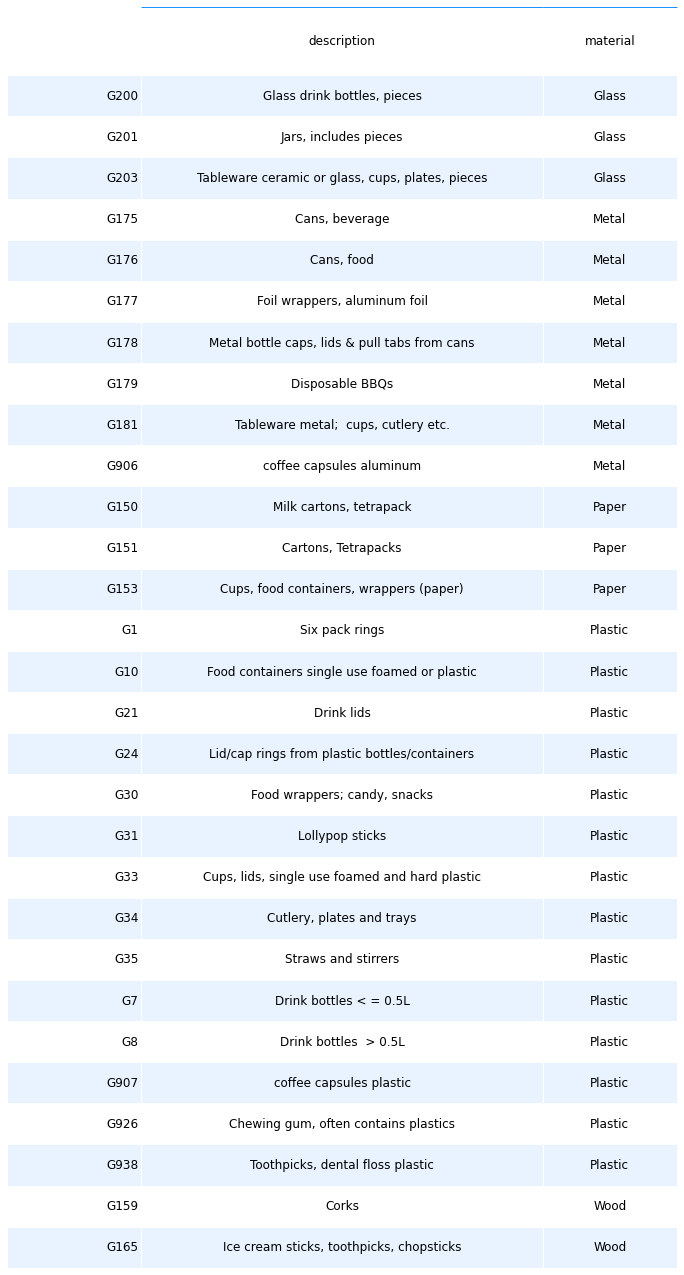

In [11]:
foodstuff = [
    'G1',
    'G8',
    'G7',
    'G10',
    'G21',
    'G24',
    'G30',
    'G151',
    'G175',
    'G176',
    'G177',
    'G178',
    'G179',
    'G181',
    'G200',
    'G201',
    'G203',
    'G150',
    'G153',
    'G159',
    'G165',
    'G31',
    'G33',
    'G34',
    'G35',
    'G906',
    'G907',
    'G926',
    'G938'
    ]
# saving to .json
# push_this_to_json(filename=F"{project_directory}/foodstuff.json", data=foodstuff)

# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(foodstuff)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

table_one=wwcodes

fig, axs = plt.subplots(figsize=(12,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Agriculture

Several codes were added to identify common items found that pertain to agriculture such as G937: _plastic pheromone baits_ commonly used in vineyards and G943: _plastic fencing_ associated with seasonal animal pasturing. The specific sheeting code G936: _greenhouse films and silage wrap_ was added for a particular type of product where the agriculture use is identifiable. 

Isolating agricultural plastic sheeting use is difficult as industrial manufacturers of plastic used in agriculture also manufacture other products for the packaging or construction sector. Predominately along Swiss shorelines plastic sheeting and films are extremely weathered and fragmented making definitive use and origin difficult to determine.

Examples of common use items attributed to agriculture group:

* G41 Gloves industrial/professional
* G191 Wire, wire mesh, barbed wire

Plasticulture includes irrigation tubing, plastic nursery pots, and a multitude of sheets and films used in horticultural, grain crop and dairy sectors. Sheeting and films are primarily low-density polyethylene (LDPE) but can also be polypropylene (PP).

About 4 percent of the plastic produced in Europe and the United States, is used each year in the agricultural sector. Nearly all plastics in agriculture must be disposed of after a single growing season largely related to chemical contamination. According to an agricultural plastic supplier for Europe; Switzerland had 3,650 T of agricultural sheeting and films sales in 2018 and the total EU used 533,310 tons. The industrial plastic sheeting removed and quantified along Swiss waters is a concern as it continues to deteriorate into micro plastic pollutants. Regulation on use of plastics and plastic waste produced are beginning in some places such as; the European Union under the Circular Economy Action Plan.

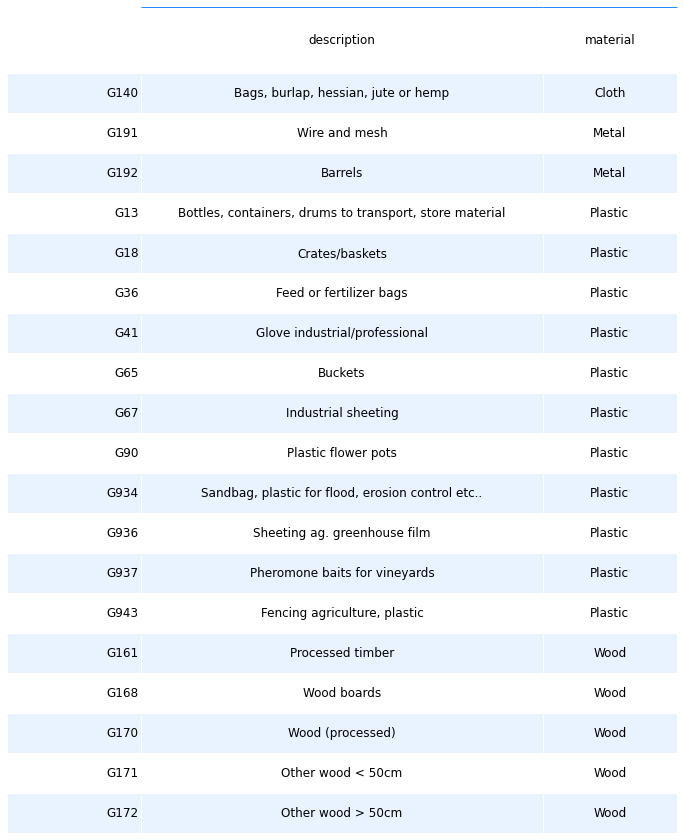

In [12]:
ag2 = [
    "G36",
    "G936",
    "G937",
    "G13",
    "G18", 
    "G41",
    "G65",
    "G67",
    "G90",
    "G140",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G191",
    "G192",
    "G934",
    "G943"
]
# saving to .json
# push_this_to_json(filename=F"{project_directory}/ag2.json", data=ag2)


wwcodes = dfCodes[dfCodes.code.isin(ag2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]
wwcodes.loc[wwcodes.code == 'G36', 'description'] = "Feed or fertilizer bags"

table_one=wwcodes

fig, axs = plt.subplots(figsize=(12,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

Industrial sheeting is attributed to agriculture due to the continuously increasing use of plastic materials in agricultural applications commonly referred to as plasticulture. The plastic materials themselves are often and broadly referred to as "ag plastics."

### Tobacco codes

All tobacco related items.

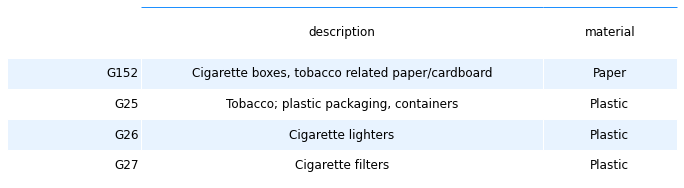

In [13]:
tobac = [
    'G25',
    'G26',
    'G27',
    'G152'
    ]
# saving to .json
# push_this_to_json(filename=F"{project_directory}/tobac.json", data=tobac)


wwcodes = dfCodes[dfCodes.code.isin(tobac)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

table_one=wwcodes

fig, axs = plt.subplots(figsize=(12,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Recreation codes

The recreational group includes fishing, hunting, boating and beach related objects, excludes food, drink and tobacco. Plastic shotgun cartridges (G70) are found in surprising numbers considering hunting is not allowed along public beaches and maybe a key indicator of travel distances through the water systems.

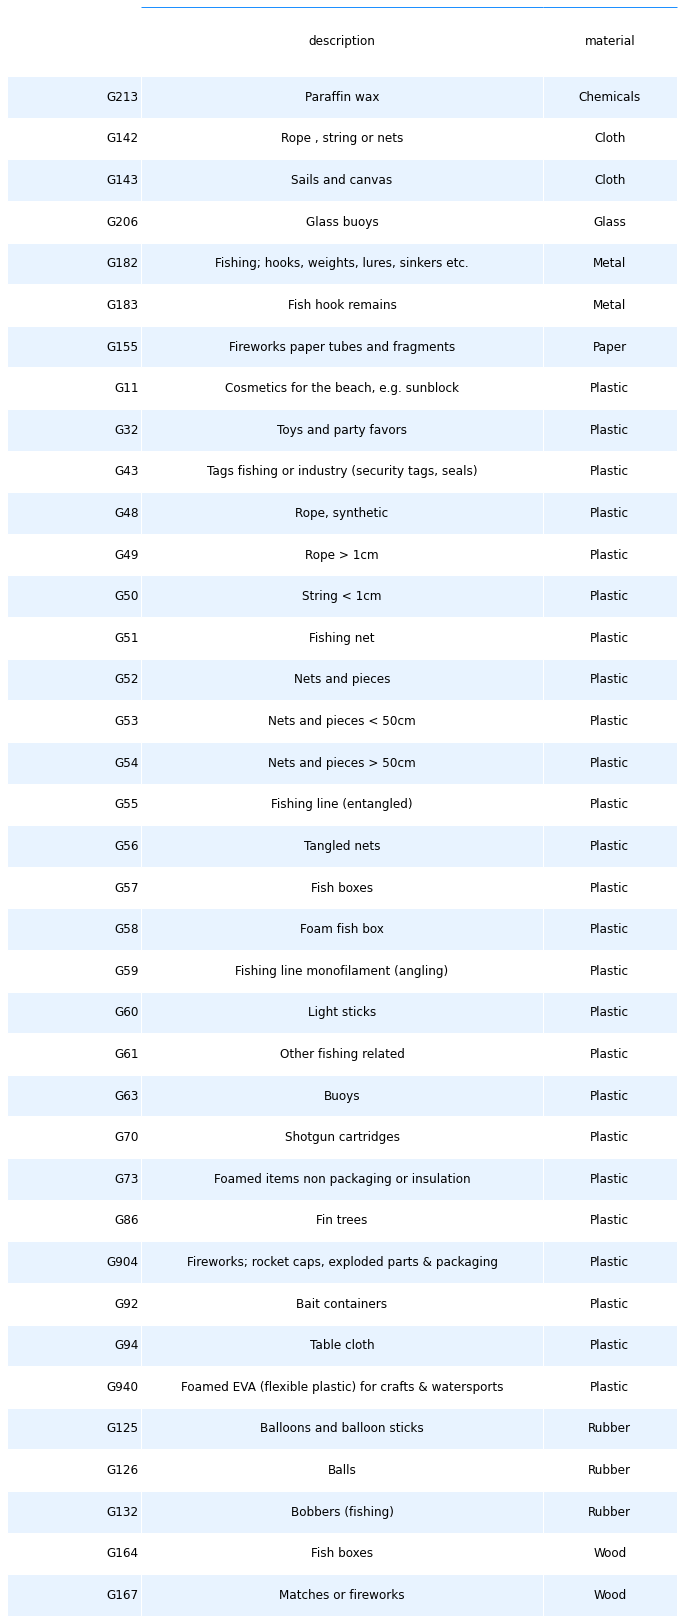

In [14]:
recreation = [
    'G32',
    'G43',
    'G48',
    'G49',
    'G50',
    'G49',
    'G51',
    'G52',
    'G53',
    'G54',
    'G53',
    'G55',
    'G56',
    'G57',
    'G58',
    'G59',
    'G60',
    'G61',
    'G63',
    'G70',
    'G73',
    'G86',
    'G92',
    'G94',
    'G206',
    'G132',
    'G142',
    'G143',
    'G155',
    'G164',
    'G167',
    'G182',
    'G183',
    'G125',
    'G126',
    'G11',
    'G213',
    'G904',
    'G940'
  ]
# saving to .json
# push_this_to_json(filename=F"{project_directory}/recreation.json", data=recreation)

wwcodes = dfCodes[dfCodes.code.isin(recreation)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]
wwcodes.loc[wwcodes.code == 'G73', 'description'] = "Foamed items non packaging or insulation"

table_one=wwcodes

fig, axs = plt.subplots(figsize=(12,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Packaging not related to food, drink, tobacco or unknown origin.
All  packaging or wrapping material including paper, plastic and metal not identified as food, drink nor tobacco related. The packaging non food/drink group includes (G941) a code added  to differentiate thin packaging films from thicker industrial sheeting. The plastic packaging films (G941) are classified as non food, drink, nor tobacco related. Commonly the films are highly deteriorated and fragmented making the original use and source difficult to determine.




*Packaging not related to tobacco or food and drink or origin unknown*

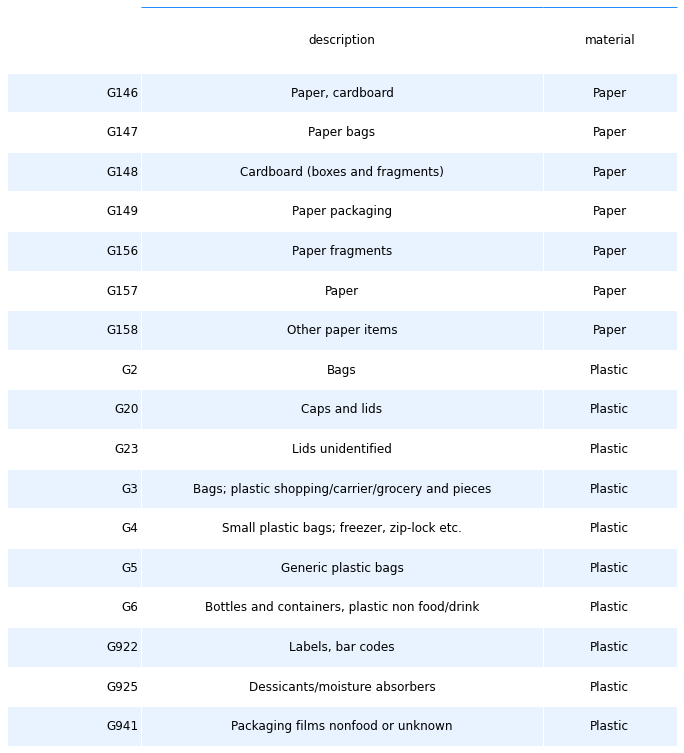

In [15]:
packaging = [
    "G23",
    "G2",
    "G146",
    "G148",
    "G149", 
    "G3", 
    "G20",
    "G4",
    "G6",
    "G147",
    "G922",
    "G941",
    "G156",
    "G157",
    "G158",
    "G925",
    "G5"
    ]
# saving to .json
# push_this_to_json(filename=F"{project_directory}/packaging.json", data=packaging)

wwcodes = dfCodes[dfCodes.code.isin(packaging)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]
wwcodes.loc[wwcodes.code == 'G925', 'description'] = "Dessicants/moisture absorbers"

table_one=wwcodes

fig, axs = plt.subplots(figsize=(12,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Personal Items

Includes accessories, hygiene and clothing related items lost or discarded. Includes pandemic related items such as face masks as well as beach related items such as sunglasses and clothing.

Additional MSFD and IQAASL codes related to personal items:

* G923 tissue, toilet paper, napkins, paper towels Parent code (G158) Other paper items
* G96 sanitary towels, pantyliners modified to include tampon applicators
* G100 medical, pharmaceutical containers and tubes

*Personal items*

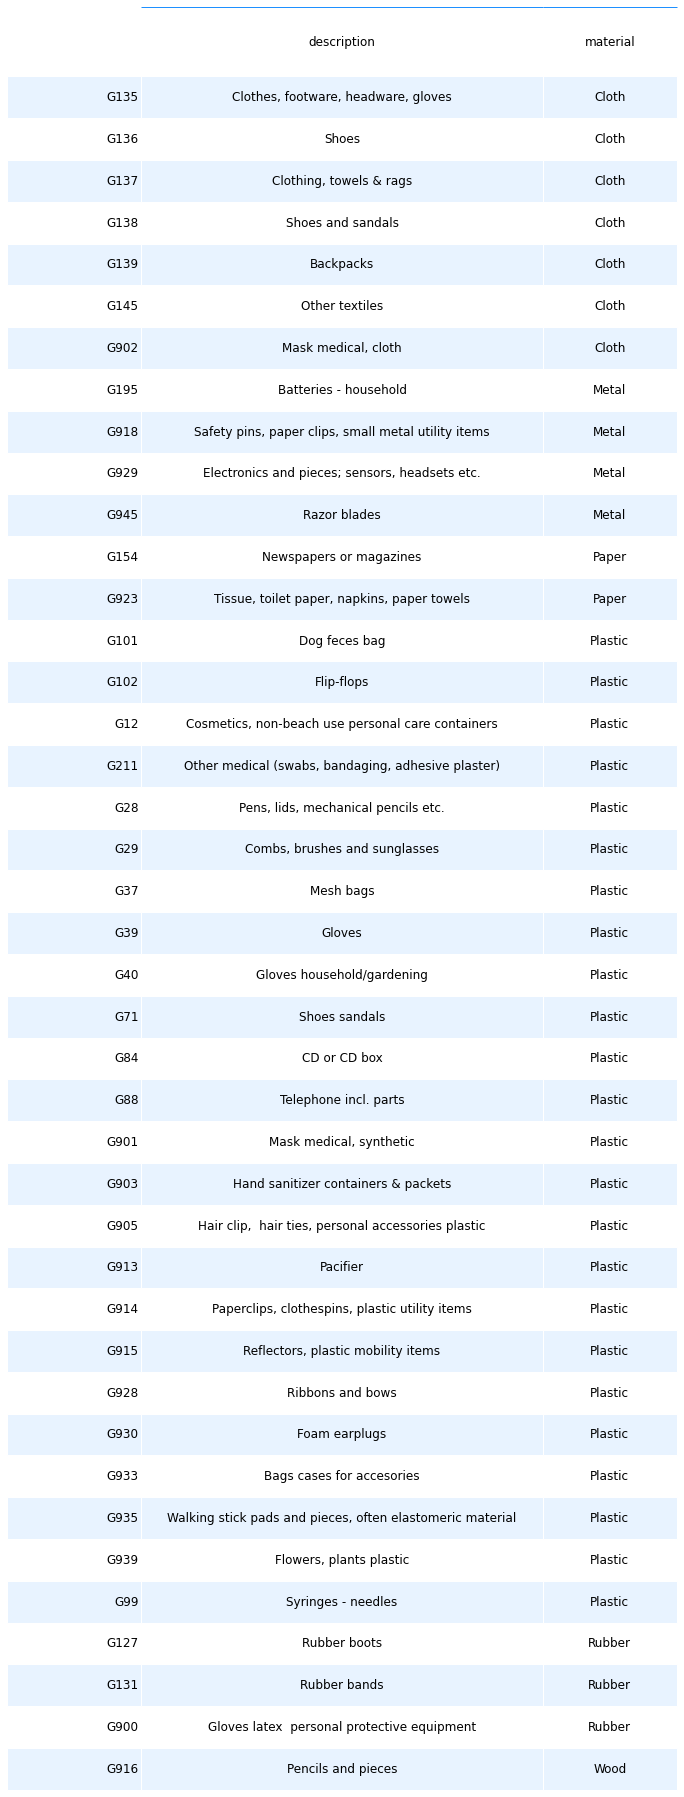

In [16]:
pi = [
    'G211',
    'G84',
    'G99',
    'G101',
    'G102',
    'G127',
    'G131',
    'G135',
    'G136',
    'G137',
    'G138',
    'G139',
    'G37',
    'G39',
    'G40',
    'G145',
    'G28',
    'G29',
    'G154',
    'G195',
    'G900',
    'G901',
    'G902',
    'G903',
    'G905',
    'G913',
    'G914',
    'G915',
    'G918',
    'G916',
    'G933',
    'G929',
    'G939',
    'G945',
    'G923',
    'G928',
    'G12',
    'G71',
    'G88',
    'G935',
    'G930'
    ]
# saving to .json
# push_this_to_json(filename=F"{project_directory}/pi.json", data=pi)

wwcodes = dfCodes[dfCodes.code.isin(pi)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]
wwcodes.loc[wwcodes.code == 'G933', 'description'] = "Bags cases for accesories"

table_one=wwcodes

fig, axs = plt.subplots(figsize=(12,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Unclassified items 

The non grouped codes are predominately items that are ambiguous in origin, rarely identified, or do not pertain to shoreline surveillance of Swiss water systems. Many of the non grouped items have a total value of 0 for all survey data included in this report.

Notable exceptions are G20 and G23 plastic caps/lids unidentified which are found in significant quantities but use and origin are unknown.

Glass or ceramic fragments >2.5cm G208 is also unclassified in this report. Predominately ceramic pieces of unknown use or origin are identified frequently and in relatively high concentrations. The occurrence of ceramic fragments may be related to the sources of material for beach replenishing practices as well as natural transport and deposition processes rather than food and drink or other beach related activities. Identifiable glass drink bottles and pieces are classified as (G200) bottles and includes pieces, they are grouped with food and drink.

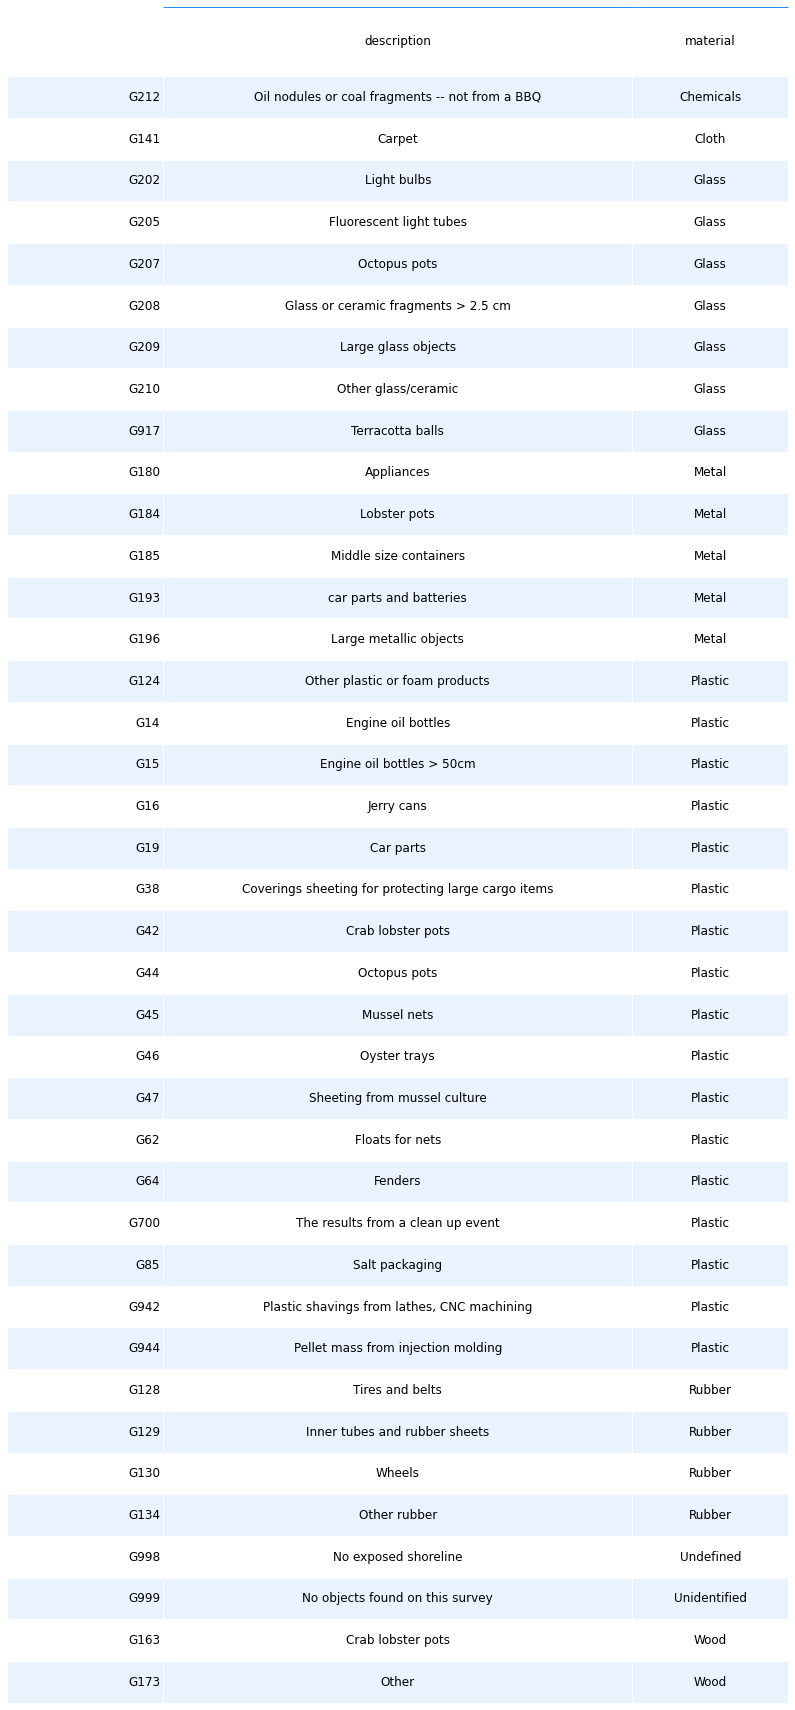

In [17]:
wwcodes = dfCodes[dfCodes.groupname == 'unclassified'][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]
wwcodes.loc[wwcodes.code == 'G38', 'description'] = "Coverings sheeting for protecting large cargo items"

table_one=wwcodes

fig, axs = plt.subplots(figsize=(14,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

In [18]:
grouped = [*pi, *packaging, *recreation, *tobac, *ag2, *foodstuff, *construction2, *codesmicro, *wastewater, *plasticpcs]

ng=dfCodes[~dfCodes.code.isin(grouped)]

figname = F"workinglist.csv"
filename=F"{output}/code_groups/{figname}"
# ng.to_csv(filename, index=None) 

# saving to .json
# push_this_to_json(filename=F"{project_directory}/nogroup.json", data=list(ng.code.unique()))

## List of added codes

*local codes added for Switzerland

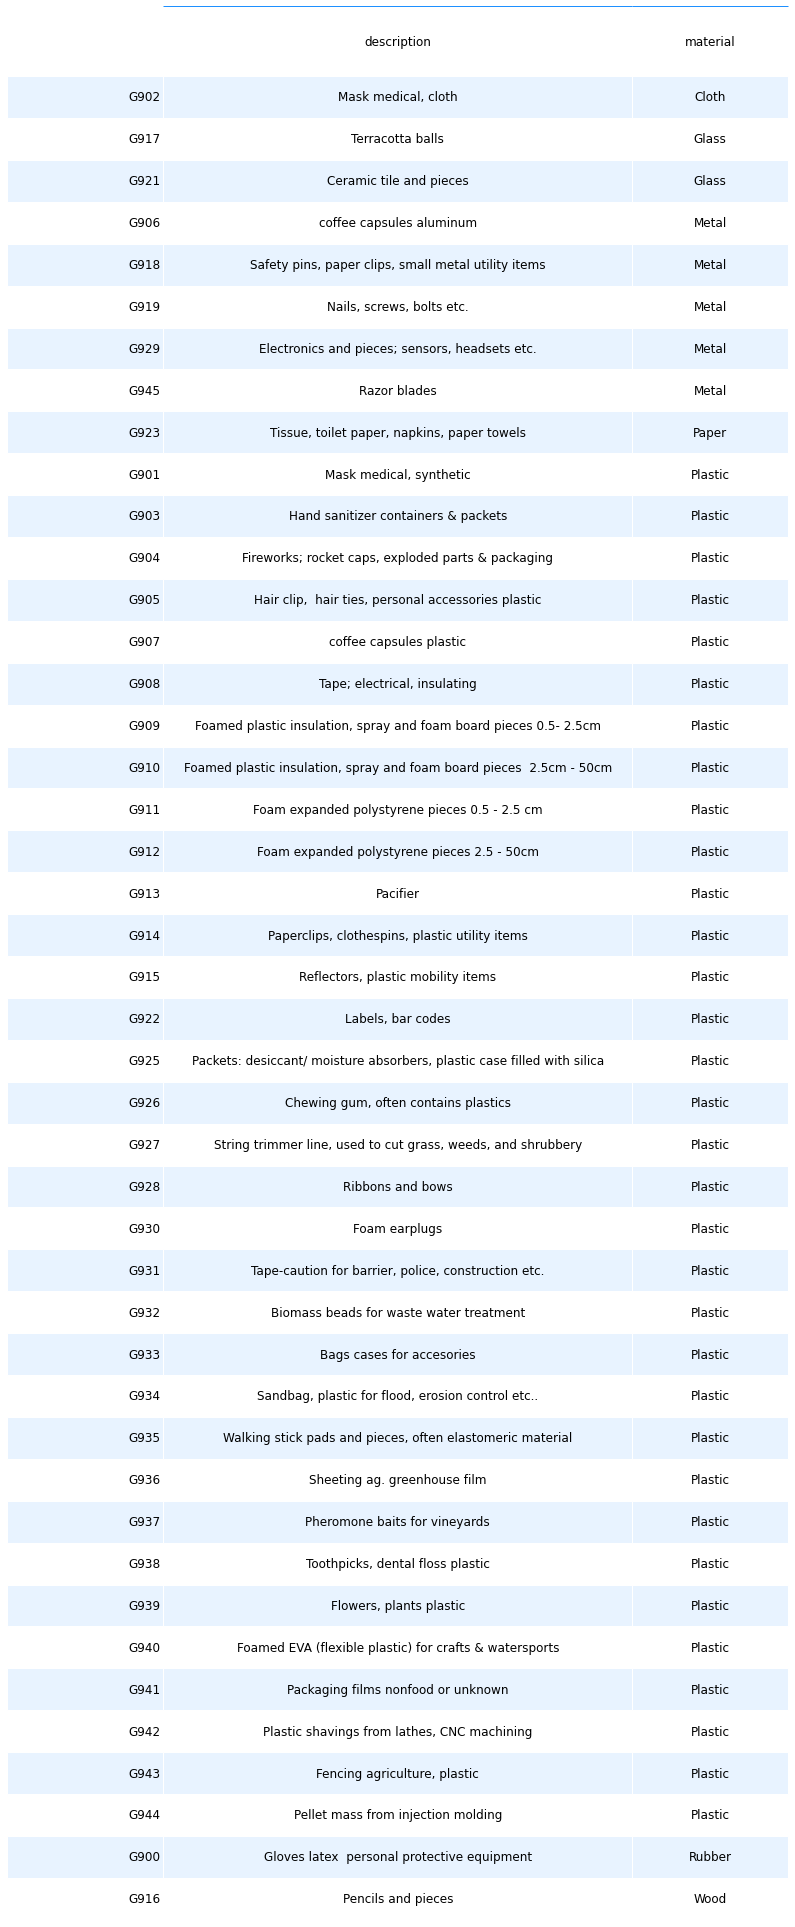

In [19]:
addcodes = [
    "G900", 
    "G901", 
    "G902", 
    "G903", 
    "G904", 
    "G905",
    "G906", 
    "G907", 
    "G908", 
    "G909", 
    "G910", 
    "G911", 
    "G912", 
    "G913", 
    "G914", 
    "G915", 
    "G916", 
    "G917", 
    "G918", 
    "G919", 
    "G920", 
    "G921", 
    "G922", 
    "G923", 
    "G925", 
    "G926", 
    "G927", 
    "G928", 
    "G929", 
    "G930",
    "G931",
    "G932",
    "G933",
    "G934",
    "G935",
    "G936",
    "G937",
    "G938",
    "G939",
    "G940",
    "G941",
    "G942",
    "G943",
    "G944",
    "G945"
]
# push_this_to_json(filename=F"{project_directory}/addcodes.json", data=addcodes)

wwcodes = dfCodes[dfCodes.code.isin(addcodes)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]
wwcodes.loc[wwcodes.code == 'G933', 'description'] = "Bags cases for accesories"
wwcodes.loc[wwcodes.code == 'G932', 'description'] = "Biomass beads for waste water treatment"

table_one=wwcodes

fig, axs = plt.subplots(figsize=(14,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.2, .6, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

In [20]:
hmm = dfAgg.copy()
hmm = hmm[["code","quantity"]].groupby("code", as_index=False).quantity.sum()

found = hmm[hmm.quantity > 0].code.unique()

ahh=[code for code in dfCodes.code if code not in found]

# saving to .json
# push_this_to_json(filename=F"{project_directory}/codeNotfound.json", data=ahh)

### Thanks for visiting

contact shannon@hammerdirt.ch

In [21]:
dfCodes[dfCodes.source_two == 'cons']
figname = F"codes_with_groups.csv"
filename=F"{output}/code_groups/{figname}"
# dfCodes.to_csv(filename, index=None) 

In [22]:
author = "shannon@hammerdirt.ch"
my_message = "fun is outside"
print(F"\nProduced by: {author}\nDate: {today}\n\n{my_message}")


Produced by: shannon@hammerdirt.ch
Date: 2021-08-11

fun is outside
